In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
hd = pd.read_csv("hd.data",names=["A","B","C","D","E","F","G","H","I","J","K","L","M","Class"],delimiter=",")

In [3]:
df = pd.DataFrame(hd)

In [4]:
df = df[(df.L.str[0] != '?')]
df = df[(df.M.str[0] != '?')]

In [5]:
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,Class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [6]:
y = df['Class']
y_= pd.unique(y)
y_

array([0, 2, 1, 3, 4], dtype=int64)

In [7]:
y_target = np.where(df['Class'] > 0 ,1,0)

In [8]:
y_target

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [9]:
X = df.drop('Class',axis=1)

In [10]:
scalar = StandardScaler()
scalar.fit(X)
scaled_data=scalar.transform(X)

pca = PCA(n_components=2)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)

In [11]:
x = X_pca[:,0]
y_= X_pca[:,1]

In [12]:
X_pca

array([[ 1.13066428e+00,  1.08765476e+00],
       [ 3.19092639e+00,  1.41788455e+00],
       [ 3.12433945e+00, -6.57007637e-01],
       [-4.84339058e-01, -1.41097228e+00],
       [-2.28454167e+00,  3.30032564e-01],
       [-2.20471346e+00, -3.45079033e-01],
       [ 1.92241607e+00,  1.68548260e+00],
       [-7.39351709e-01,  8.11668896e-01],
       [ 1.37751648e+00, -3.34105429e-02],
       [ 2.68641029e+00, -8.19561080e-01],
       [ 2.47716802e-02, -1.11562239e+00],
       [-7.08398525e-01,  1.82800766e+00],
       [ 1.42274667e+00,  2.21304552e-01],
       [-2.01252654e+00, -1.19231677e+00],
       [-4.97656698e-01,  2.69306227e-01],
       [-1.35996775e+00, -4.07562940e-01],
       [-4.67730581e-01, -1.81446789e+00],
       [-1.03455100e+00, -3.51939541e-01],
       [-1.78895535e+00,  5.30696632e-01],
       [-2.23147665e+00, -2.07151096e-01],
       [ 1.15061656e-01, -4.04600927e-01],
       [-1.47608120e+00,  3.04862893e+00],
       [-5.50282752e-01,  4.63912226e-01],
       [ 8.

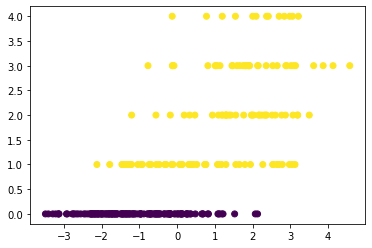

In [13]:
plt.scatter(x,y,c= y_target)

In [14]:
X = X_pca.astype(int)
Y = y_target.astype(int)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = .30,random_state = 4)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((207, 2), (90, 2), (207,), (90,))

In [17]:
classifier = svm.SVC(kernel = 'linear',random_state=0)

In [18]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
#classification report 
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        54
           1       0.69      0.92      0.79        36

    accuracy                           0.80        90
   macro avg       0.81      0.82      0.80        90
weighted avg       0.83      0.80      0.80        90



In [21]:
#confusion matrix
confusion_matrix(y_true = y_test,y_pred=y_pred)

array([[39,  3],
       [15, 33]], dtype=int64)

In [22]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8